In [1]:
import os, sys, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline 

In [2]:
folder_path = './../results/'
algorithm = 'DE/best/1/bin'
dim = 30
pop_size = 30

In [3]:
output_filepath = folder_path+algorithm
os.listdir(output_filepath)

['[14_10_51_300_0.01_0.5_False_None]df_sumup.tsv',
 '[14_10_51_300_0.01_0.5_False_None]hist.tsv',
 '[14_10_51_300_0.01_0.5_False_None]log.tsv',
 '[14_10_51_300_0.01_0.5_False_None]mean_error_evolution.jpeg',
 '[14_10_51_300_0.1_0.5_False_None]df_sumup.tsv',
 '[14_10_51_300_0.1_0.5_False_None]hist.tsv',
 '[14_10_51_300_0.1_0.5_False_None]log.tsv',
 '[14_10_51_300_0.1_0.5_False_None]mean_error_evolution.jpeg',
 '[14_10_51_300_0.2_0.5_False_None]df_sumup.tsv',
 '[14_10_51_300_0.2_0.5_False_None]hist.tsv',
 '[14_10_51_300_0.2_0.5_False_None]log.tsv',
 '[14_10_51_300_0.2_0.5_False_None]mean_error_evolution.jpeg',
 '[14_10_51_300_0.3_0.5_False_None]df_sumup.tsv',
 '[14_10_51_300_0.3_0.5_False_None]hist.tsv',
 '[14_10_51_300_0.3_0.5_False_None]log.tsv',
 '[14_10_51_300_0.3_0.5_False_None]mean_error_evolution.jpeg',
 '[14_10_51_300_0.4_0.5_False_None]df_sumup.tsv',
 '[14_10_51_300_0.4_0.5_False_None]hist.tsv',
 '[14_10_51_300_0.4_0.5_False_None]log.tsv',
 '[14_10_51_300_0.4_0.5_False_None]mean

In [4]:

df_sumup = None
for filename in os.listdir(output_filepath):
    re_result = re.search('df_sumup', filename)
    if re_result is not None:
        dim_file = int(filename.split('_')[1])
        pop_size_file = int(filename.split('_')[3])
        if dim_file == dim and pop_size_file == pop_size:    
            print (filename)
            df_temp = pd.read_csv(output_filepath+'/'+filename, sep='\t')
            if df_sumup is None:
                df_sumup = df_temp.copy()
            else:
                df_sumup = pd.concat([df_sumup, df_temp]).copy()            
            run_tag = re.search('(\[.*\])', filename).group()
            
df_sumup['elapsed_time'] = df_sumup['elapsed_time'].apply(lambda x: '{:.02f}'.format(60*int(x.split(':')[0]) + int(x.split(':')[1])+int(x.split(':')[2])/60)) 
df_sumup.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_sumup.reset_index(drop = True, inplace=True)
df_sumup.sort_values(by=['#Fc', 'percFES'], inplace=True)
print ('df_sumup shape: ', df_sumup.shape)

[14_30_51_30_0.01_0.5_False_None]df_sumup.tsv
[14_30_51_30_0.1_0.5_False_None]df_sumup.tsv
[14_30_51_30_0.2_0.5_False_None]df_sumup.tsv
[14_30_51_30_0.3_0.5_False_None]df_sumup.tsv
[14_30_51_30_0.4_0.5_False_None]df_sumup.tsv
[14_30_51_30_0.5_0.5_False_None]df_sumup.tsv
[14_30_51_30_0.6_0.5_False_None]df_sumup.tsv
[14_30_51_30_0.7_0.5_False_None]df_sumup.tsv
[14_30_51_30_0.8_0.5_False_None]df_sumup.tsv
[14_30_51_30_0.9_0.5_False_None]df_sumup.tsv
[14_30_51_30_1.0_0.5_False_None]df_sumup.tsv
[1_30_51_30_0.01_0.5_False_None]df_sumup.tsv
[1_30_51_30_0.1_0.5_False_None]df_sumup.tsv
[1_30_51_30_0.2_0.5_False_None]df_sumup.tsv
[1_30_51_30_0.3_0.5_False_None]df_sumup.tsv
[1_30_51_30_0.4_0.5_False_None]df_sumup.tsv
[1_30_51_30_0.5_0.5_False_None]df_sumup.tsv
[1_30_51_30_0.6_0.5_False_None]df_sumup.tsv
[1_30_51_30_0.7_0.5_False_None]df_sumup.tsv
[1_30_51_30_0.8_0.5_False_None]df_sumup.tsv
[1_30_51_30_0.9_0.5_False_None]df_sumup.tsv
[1_30_51_30_1.0_0.5_False_None]df_sumup.tsv
[2_30_51_30_0.01_0.

In [5]:
df_sumup.head()

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
11,DE/best/1/bin,1,30,0.01,1.334683e+08,8.165518e+07,5.197566e+07,5.833376e+07,7.268924e+07,9.305976e+07,...,1.234849e+08,8.241082e+07,1.215648e+08,8.172882e+07,1.474944e+08,6.408151e+07,1.495121e+08,9.999889e+07,6.82,2910
12,DE/best/1/bin,1,30,0.10,3.527337e+05,6.346695e+05,6.840732e+05,4.862383e+05,1.304101e+06,2.727721e+05,...,1.582327e+06,1.311126e+06,5.900310e+05,7.962418e+05,5.344657e+05,9.806320e+05,6.035812e+05,8.919898e+05,121.87,29040
13,DE/best/1/bin,1,30,0.20,3.738910e+05,1.071849e+05,1.447330e+05,5.357816e+05,7.047809e+05,2.964177e+05,...,2.225427e+05,2.413883e+05,4.776334e+05,3.619609e+05,1.090785e+06,2.328659e+05,4.521605e+05,3.093838e+05,233.23,58080
14,DE/best/1/bin,1,30,0.30,2.254129e+05,1.472693e+05,7.481650e+04,2.979453e+04,1.886499e+05,7.637763e+04,...,1.058410e+05,7.620461e+04,6.112534e+04,1.160980e+05,1.343965e+05,8.098153e+04,1.309149e+05,1.450612e+05,307.07,87120
15,DE/best/1/bin,1,30,0.40,3.958228e+04,6.849736e+04,1.614158e+05,3.726257e+04,1.166575e+05,1.199515e+05,...,3.949024e+04,2.305117e+04,8.388934e+04,3.593152e+04,4.877829e+04,1.844846e+04,4.545501e+04,5.786537e+04,371.03,116160


In [6]:
df_maxperc = pd.DataFrame(columns=['Fi - D' + str(dim), 'Best', 'Worst', 'Median', 'Mean', 'Std Dev', 'Success Rate (%)', 'Elapsed Time (min)'])
for index, row in df_sumup[df_sumup['percFES'] == 1].iterrows():
    funcId = 'F' + str(row['#Fc'])
#     best = '{:.2E}'.format(np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).min())
    best = np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).min()
    worst = np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).max()
    median = np.median(np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]))
    mean = np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).mean()
    std = np.array(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]]).std()
    successRate = np.where(row[['run_' + str(x) for x in np.arange(1,51+1, 1)]] < 1e-8)[0].shape[0]/51
    elapsed_time = row['elapsed_time']
    df_maxperc.loc[df_maxperc.shape[0]] = np.array([funcId, best, worst, median, mean, std, successRate, elapsed_time])    
df_maxperc['Best']=df_maxperc['Best'].apply(lambda x: float(x))    
df_maxperc.sort_values(['Best'], ascending=True, inplace=True)
df_maxperc['Best']=df_maxperc['Best'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Worst']=df_maxperc['Worst'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Median']=df_maxperc['Median'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Mean']=df_maxperc['Mean'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Std Dev']=df_maxperc['Std Dev'].apply(lambda x: '{:.2E}'.format(float(x)))
df_maxperc['Success Rate (%)']=df_maxperc['Success Rate (%)'].apply(lambda x: '{:.02f}'.format(100*float(x)))
df_maxperc.to_csv(output_filepath+'/' + re.sub('\[(\d+_)', '[ALLF_', run_tag) + 'df_maxperc.csv', sep=',', index=None)
df_maxperc

,Fi - D30,Best,Worst,Median,Mean,Std Dev,Success Rate (%),Elapsed Time (min)
1,F2,8.05E-09,9.98E-09,9.76E-09,9.59E-09,4.57E-10,100.00,198.30
3,F7,8.30E-09,1.10E-01,7.40E-03,1.42E-02,1.92E-02,39.22,437.58
5,F14,1.39E-01,9.53E-01,3.00E-01,3.09E-01,1.16E-01,0.00,1046.48
2,F6,5.58E+00,2.18E+01,1.26E+01,1.28E+01,3.58E+00,0.00,603.23
4,F9,4.48E+01,2.02E+02,8.56E+01,8.71E+01,3.08E+01,0.00,1046.87
0,F1,1.01E+02,2.99E+04,6.20E+03,7.36E+03,5.93E+03,0.00,654.97


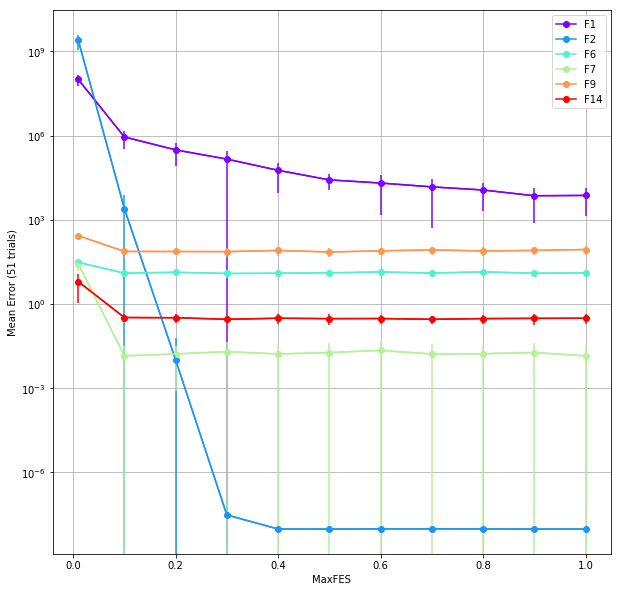

In [7]:
fig, ax = plt.subplots(figsize=(10,10), nrows=1, ncols=1)
color=plt.cm.rainbow(np.linspace(0,1,df_sumup['#Fc'].unique().shape[0]))
for index, funcId in enumerate(df_sumup['#Fc'].unique()):
    df_temp = df_sumup[df_sumup['#Fc'] == funcId].copy()
    arr_percFes = np.array(df_temp['percFES'])
    arr_mean = np.array(df_temp[['run_' + str(x) for x in np.arange(1,51+1, 1)]].mean(axis=1))
    arr_std = np.array(df_temp[['run_' + str(x) for x in np.arange(1,51+1, 1)]].std(axis=1))

    ax.errorbar(x=arr_percFes, y=arr_mean, yerr=arr_std, c=color[index])
    ax.plot(arr_percFes, arr_mean, '-o', color=color[index], label = 'F' + str(funcId))
ax.grid(True)
ax.legend()
ax.set_xlabel('MaxFES')
ax.set_ylabel('Mean Error ({} trials)'.format(51))
plt.yscale('log')
plt.savefig(output_filepath+'/' + re.sub('\[(\d+_)', '[ALLF_', run_tag) + 'mean_maxFES.jpeg', bbox_inches = 'tight')

In [9]:

df_sumup = None
for filename in os.listdir(output_filepath):
    re_result = re.search('df_sumup', filename)
    if re_result is not None:
        dim_file = int(filename.split('_')[1])
        pop_size_file = int(filename.split('_')[3])
        if dim_file in [10, 30] and pop_size_file == pop_size:                
            df_temp = pd.read_csv(output_filepath+'/'+filename, sep='\t')
            if df_sumup is None:
                df_sumup = df_temp.copy()
            else:
                df_sumup = pd.concat([df_sumup, df_temp]).copy()            
            run_tag = re.search('(\[.*\])', filename).group()
            
df_sumup['elapsed_time'] = df_sumup['elapsed_time'].apply(lambda x: '{:.02f}'.format(60*int(x.split(':')[0]) + int(x.split(':')[1])+int(x.split(':')[2])/60)) 
df_sumup.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_sumup.reset_index(drop = True, inplace=True)
df_sumup.sort_values(by=['#Fc', 'percFES'], inplace=True)
print ('df_sumup shape: ', df_sumup.shape)

df_sumup shape:  (132, 58)


In [10]:
df_sumup.head()

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
22,DE/best/1/bin,1,10,0.01,3.060724e+06,1.049214e+07,3.023181e+06,1.282800e+07,6.340894e+06,5.039481e+06,...,2.742411e+06,4.654872e+06,2.784387e+06,1.885590e+06,1.249119e+07,6.097014e+06,1.599807e+07,6.463584e+06,2.73,990
33,DE/best/1/bin,1,30,0.01,1.334683e+08,8.165518e+07,5.197566e+07,5.833376e+07,7.268924e+07,9.305976e+07,...,1.234849e+08,8.241082e+07,1.215648e+08,8.172882e+07,1.474944e+08,6.408151e+07,1.495121e+08,9.999889e+07,6.82,2910
23,DE/best/1/bin,1,10,0.10,5.069612e+02,1.035745e+02,1.734952e+02,6.902531e+02,1.485909e+02,1.432049e+03,...,1.218658e+02,1.011009e+02,1.007233e+03,1.371536e+02,1.444354e+03,6.848246e-01,4.061533e+00,8.453987e+02,28.10,9690
34,DE/best/1/bin,1,30,0.10,3.527337e+05,6.346695e+05,6.840732e+05,4.862383e+05,1.304101e+06,2.727721e+05,...,1.582327e+06,1.311126e+06,5.900310e+05,7.962418e+05,5.344657e+05,9.806320e+05,6.035812e+05,8.919898e+05,121.87,29040
24,DE/best/1/bin,1,10,0.20,2.098466e-01,4.128356e-04,1.319390e-04,4.344438e-03,6.362777e-04,3.817045e+00,...,4.801576e-02,6.673564e-05,1.673622e-03,1.052574e-03,4.240355e-05,2.359095e-03,9.192454e-02,7.670517e+00,58.83,19380


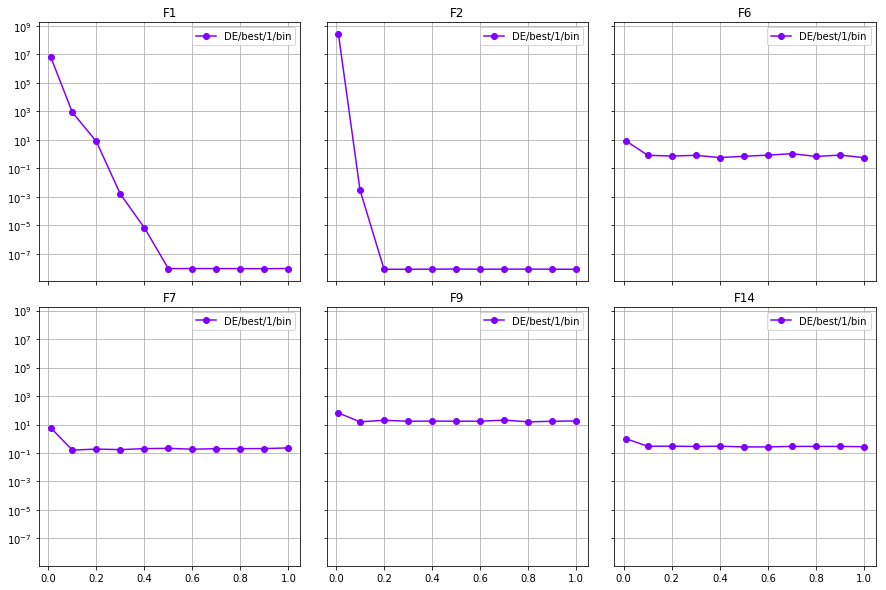

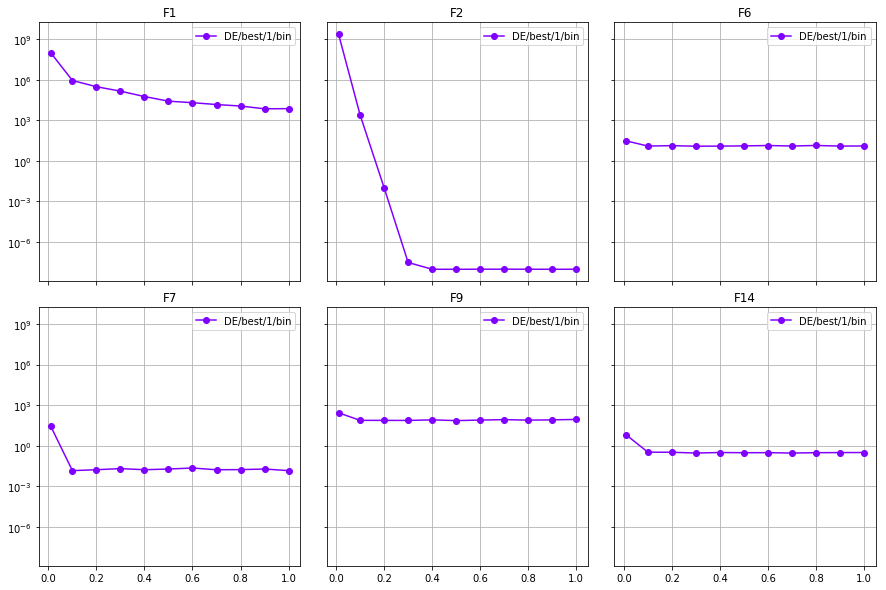

In [90]:
# Percorrer para todas as dimensoes 

for dim in [10,30]:
    fig, ax = plt.subplots(figsize=(15,10), ncols=3, nrows=2, sharex=True, sharey=True)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.1, hspace=.1)
    color=plt.cm.rainbow(np.linspace(0,1,df_sumup['algorithm'].unique().shape[0]))

    for index_function, funcId in enumerate(df_sumup['#Fc'].unique()):
        for index_model, model in enumerate(df_sumup['algorithm'].unique()):
            df_temp = df_sumup[df_sumup['#Fc'] == funcId].copy()
            df_temp = df_temp[df_temp['D'] == dim]
            df_temp = df_temp[df_temp['algorithm'] == model]

            arr_percFes = np.array(df_temp['percFES'])
            arr_mean = np.array(df_temp[['run_' + str(x) for x in np.arange(1,51+1, 1)]].mean(axis=1))
            arr_std = np.array(df_temp[['run_' + str(x) for x in np.arange(1,51+1, 1)]].std(axis=1))    

            ax_func = ax.flatten()[index_function]        
            ax_func.plot(arr_percFes, arr_mean, '-o', color=color[index_model], label = model)
            ax_func.grid(True)
            ax_func.legend()
            ax_func.set_title('F'+str(funcId))        
            ax_func.set_yscale('log')

    plt.savefig(output_filepath+'/' + re.sub('\[(\d+_)', '[ALLF_', run_tag) + 'all_func_dim_' + str(dim) + '.jpeg', bbox_inches = 'tight')

In [88]:
run_tag

'[9_30_51_30_1.0_0.5_False_None]'

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), nrows=1, ncols=1)
color=plt.cm.rainbow(np.linspace(0,1,df_sumup['#Fc'].unique().shape[0]))
for index, funcId in enumerate(df_sumup['#Fc'].unique()):
    df_temp = df_sumup[df_sumup['#Fc'] == funcId].copy()
    arr_percFes = np.array(df_temp['percFES'])
    arr_mean = np.array(df_temp[['run_' + str(x) for x in np.arange(1,51+1, 1)]].mean(axis=1))
    arr_std = np.array(df_temp[['run_' + str(x) for x in np.arange(1,51+1, 1)]].std(axis=1))

    ax.errorbar(x=arr_percFes, y=arr_mean, yerr=arr_std, c=color[index])
    ax.plot(arr_percFes, arr_mean, '-o', color=color[index], label = 'F' + str(funcId))
ax.grid(True)
ax.legend()
ax.set_xlabel('MaxFES')
ax.set_ylabel('Mean Error ({} trials)'.format(51))
plt.yscale('log')
plt.savefig(output_filepath+'/' + re.sub('\[(\d+_)', '[ALLF_', run_tag) + 'mean_maxFES.jpeg', bbox_inches = 'tight')